# NYT Data Explorer

Explores the NYT county data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

The NYT data (3/29) is from https://github.com/nytimes/covid-19-data

In [2]:
df = pd.read_csv('nyt_data/us-counties.csv', parse_dates=['date'])

In [7]:
pa_only = df[df['state']=='Pennsylvania'].reset_index(drop=True)

In [8]:
pa_only

,date,county,state,fips,cases,deaths
0,2020-03-06,Delaware,Pennsylvania,42045.0,1,0
1,2020-03-06,Wayne,Pennsylvania,42127.0,1,0
2,2020-03-07,Delaware,Pennsylvania,42045.0,1,0
3,2020-03-07,Montgomery,Pennsylvania,42091.0,2,0
4,2020-03-07,Wayne,Pennsylvania,42127.0,1,0
...,...,...,...,...,...,...
550,2020-03-29,Warren,Pennsylvania,42123.0,1,0
551,2020-03-29,Washington,Pennsylvania,42125.0,24,0
552,2020-03-29,Wayne,Pennsylvania,42127.0,7,0
553,2020-03-29,Westmoreland,Pennsylvania,42129.0,47,0


In [9]:
surrounding = ['Beaver', 'Butler', 'Armstrong', 'Westmoreland', 'Allegheny', 'Washington', 'Fayette']

In [20]:
near_pgh = pa_only[pa_only['county'].isin(surrounding)].reset_index(drop=True)
near_pgh.drop(columns=['fips'], inplace=True)

In [26]:
near_pgh_summary = near_pgh.groupby(['date']).sum()
near_pgh_summary.index
near_pgh_summary.index.freq='D'
near_pgh_summary.sort_index(inplace=True)

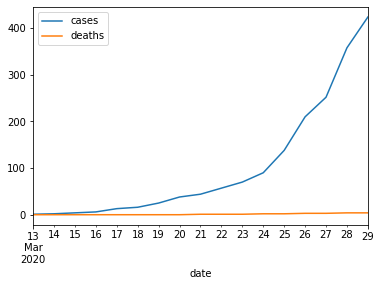

In [27]:
ax = near_pgh_summary.plot()